### MACHINE LEARNING ON INDIAN DIABETES DATASET

Machine learning is a very exciting field for data scientists. Despite all the books, tutorials and blogs dedicated for it, ML is still tricky. In this section, we will apply some ML algorithms to predict whether or not a patient has diabetes, based on several medical predictor variables included in the dataset.

The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Before applying ML algorithms to data, it is good to know about "data": type of variables, the outcome to predict, the distribution of these variables and so on. 
During this project, We will focus on the following steps:

     1. LOADING DATA
The data can be found on my github associated with this project or in the kaggle website [the documentation](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data).

In [9]:
import pandas as pd
col_names = ['Pregnancies', 'Glucose', 'Diastolic', 'Triceps', 'Insulin', 'BMI', 'DPF', 'Age', 'Class']
diabetes = pd.read_csv('PimaIndiansDiabetes.csv', header = None, names = col_names)
print(diabetes.head())

   Pregnancies  Glucose  Diastolic  Triceps  Insulin   BMI    DPF  Age  Class
0            6      148         72       35        0  33.6  0.627   50      1
1            1       85         66       29        0  26.6  0.351   31      0
2            8      183         64        0        0  23.3  0.672   32      1
3            1       89         66       23       94  28.1  0.167   21      0
4            0      137         40       35      168  43.1  2.288   33      1


In [2]:
print ('The data has {0} rows and {1} columns'.format(diabetes.shape[0], diabetes.shape[1]))

The data has 768 rows and 9 columns


     2. VARIABLE IDENTIFICATION
First, let's identify our Predictor(s) (Input) and the Target (output or outcome) variables. 
As we can see from the dataframe, the predictor 'Class' is binary (0 or 1). So, we are dealing with a binary classification and all the predictors are numeric (Pregnancies, Glucose, Triceps, Insulin, BMI, DPF, Age).

We have 768 instances and the following 8 attributes:

   Number of times of being pregnant
   Plasma glucose concentration at 2 hours in an oral glucose tolerance test
   Diastolic blood pressure in mm Hg 
   Triceps skin fold thickness in mm 
   2-Hour serum insulin in mu U/ml 
   Body mass index measured as weight in kg/(height in m)^2 
   Diabetes pedigree function
   Age in years

     3. EXPLORATORY DATA ANALYSIS 
Visualizing our variables helps us understand their distribution and nature (normal or skewed, missing, zero variance feature) so that they can be treated properly. 

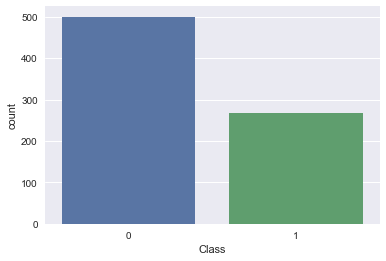

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
ax=sns.countplot(x='Class', data=diabetes)
plt.show()

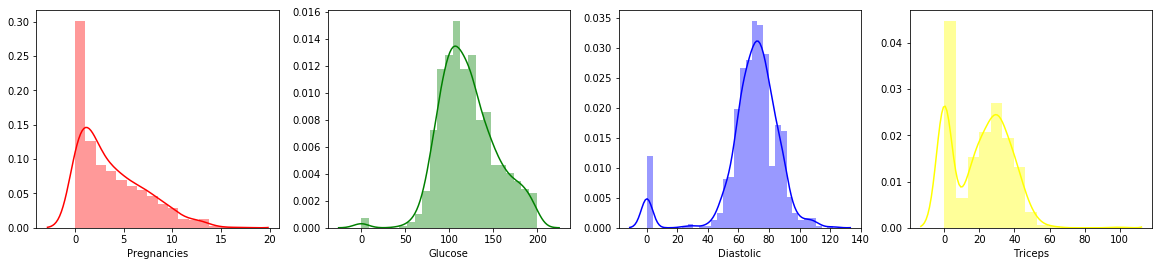

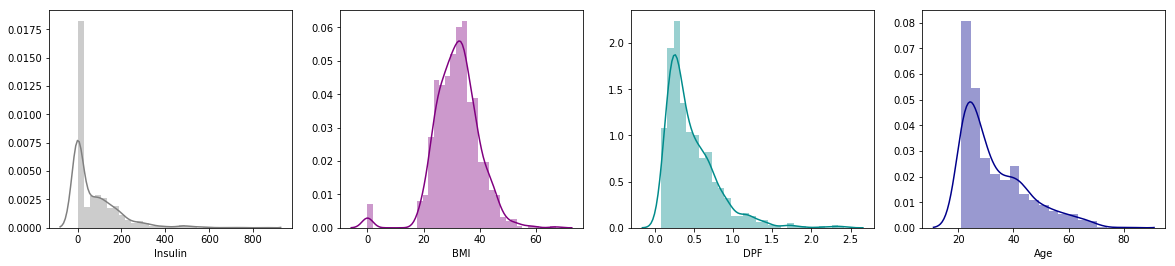

In [3]:
import numpy as np

fig, ax = plt.subplots(ncols=4, figsize=(20, 4))
fig, ax2 = plt.subplots(ncols=4, figsize=(20, 4))
col = ['red', 'green', 'blue', 'yellow', 'gray', 'purple', 'darkcyan', "darkblue"]
ax = np.append(ax, ax2)
def before_cleaning(df, ax):
        for i,a in enumerate(ax):
            sns.distplot(df.iloc[:, i], ax = a, color = col[i])
before_cleaning(diabetes, ax)
plt.show()


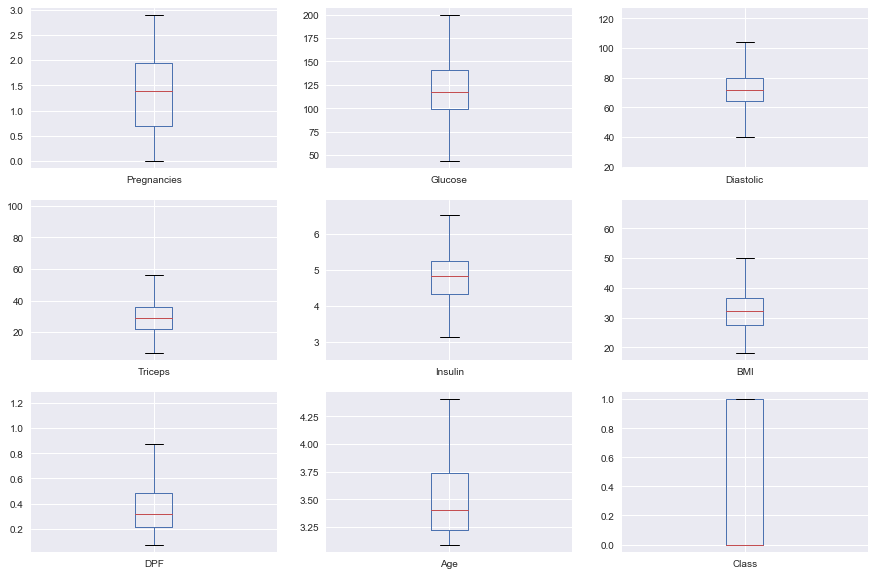

In [147]:
sns.set(style='darkgrid')
diabetes.plot(kind='box', subplots=True, sharex=False, layout=(3,3), figsize=(15,10))
plt.show()

The plots show the distribution of each variable in the diabetes dataframe. 
    Some of the variables are right skewed (Pregnencies, Insulin, DPF and Age)
    Glucose, Diastolic, Triceps and BMI look normally distributed.
    Most of females are young, less than 50 years old.
    
Notice that Triceps and Insulin have many observations coded as 0 (missing values), followed by Diastolic, BMI and Glucose variables.

     4. DATA PRE-PROCESSING: RECODE MISSING VALUES

In [3]:
import numpy as np

def recode_missingval(df, n):
    for i in n:
        df.iloc[:, i].replace(0, np.NaN, inplace = True)
    return df

recode_missingval(diabetes, range(1, 6))
diabetes.isnull().sum() 

Pregnancies      0
Glucose          5
Diastolic       35
Triceps        227
Insulin        374
BMI             11
DPF              0
Age              0
Class            0
dtype: int64

Notice that Glucose, Diastolic, Triceps, Insulin and BMI have 5, 35, 227, 374 and 11 missing values respectively. So, we are going to make some imputations to fill them.

#### DISTRIBUTION AFTER RECODING 0 AS NaN

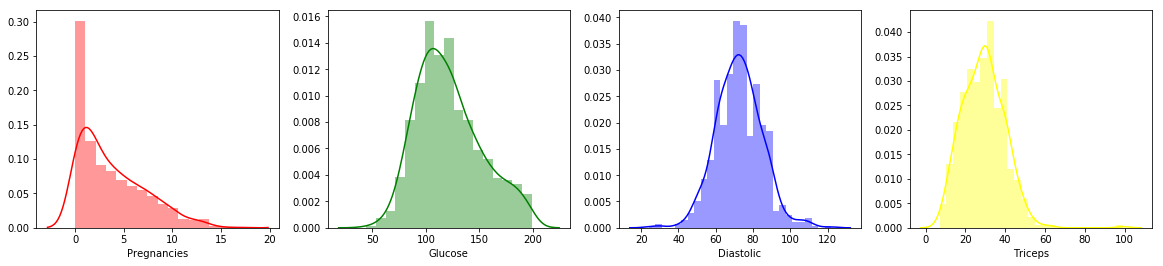

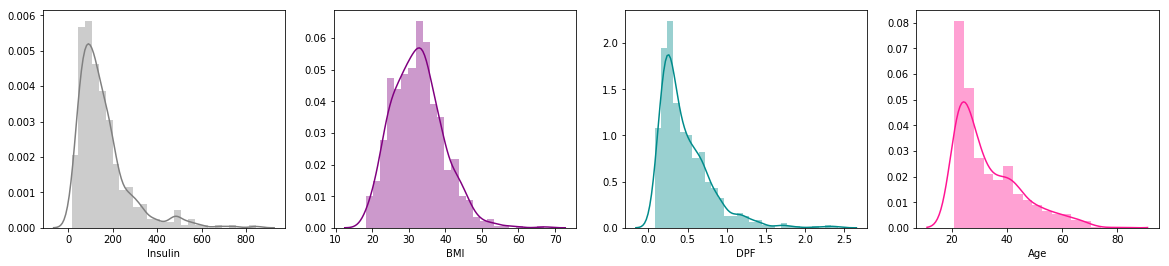

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 4))
fig, ax2 = plt.subplots(ncols=4, figsize=(20, 4))
col = ['red', 'green', 'blue', 'yellow', 'gray', 'purple', 'darkcyan', 'deeppink']
ax = np.append(ax, ax2)
def before(df, ax):
        for i,a in enumerate(ax):
            sns.distplot(df.iloc[:, i].dropna(), ax = a, color = col[i])
before(diabetes, ax)
plt.show()

In [6]:
miss = diabetes.isnull().sum()/len(diabetes)
print(miss[miss > 0].nlargest())

Insulin      0.486979
Triceps      0.295573
Diastolic    0.045573
BMI          0.014323
Glucose      0.006510
dtype: float64


That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [5]:
import numpy as np
total_cells = np.product(diabetes.shape)
missing_values = diabetes.isnull().sum()
(missing_values.sum() / total_cells) * 100

9.4328703703703702

9.43% missing values in the whole data set.

The distribution has changed for some variables after recoding 0 as NaN. The plots show no value coded as 0 for the variables treated above. There are many different ways to handle missing data: we can remove all the rows containing NaN but for this dataframe we lose a lot of informations(more 48% of the rows are coded as NaN for Insulin). So, we can do some imputation instead by replacing the missing data by the mean of each variable for example.

In [6]:
#Looking for some correlation between variables
#sns.heatmap(diabetes.corr(), annot=True)
#plt.show()
print(diabetes.corr()['Class'].sort_values(ascending=False))

Class          1.000000
Glucose        0.494650
BMI            0.313680
Insulin        0.303454
Triceps        0.259491
Age            0.238356
Pregnancies    0.221898
DPF            0.173844
Diastolic      0.170589
Name: Class, dtype: float64


Reviewing the correlation results for all attributes in the dataset shows that:
    There is no strong relationship between each variable and diabetes. Maybe because the dataset is small.
    Glucose seems to be more correlated compared to other variables, followed by BMI, Age, and Pregnancies.
    There is no obvious correlation between DPF and diabetes. This may suggest that diabetes is not hereditary (or we really need more data).

Let's clean the dataframe and explore it entirely without removing any variable even if it shows no correlation between Triceps, Diastolic and Diabetes. We can try to remove not correlated variables later in another section.

     5.1 DATA PRE-PROCESSING: transform numeric features and remove their skewness
As we saw earlier, we have to deal with skewness for some variables.

In [8]:
numeric_features = diabetes.columns[0:8]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = diabetes[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.7]
skewed = skewed.index
diabetes[skewed] = np.log1p(diabetes[skewed])

     5.2 DATA PRE-PROCESSING: IMPUTE MISSING VALUES

In [9]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

diab_cleaned = imp.fit_transform(diabetes)
print('Mean before scaling: {}' .format(np.mean(diab_cleaned)))
print('standard deviation before scaling:{}'.format(np.std(diab_cleaned)))

diab_cleaned = pd.DataFrame(diab_cleaned, columns = col_names)

Mean before scaling: 29.558638800601944
standard deviation before scaling:41.26384006919528


There is a lot of variation (std = 41) around the mean in our dataframe. One way to reduce variability is to have our data in the same scale.

     5.3 DATA PRE-PROCESSING: SCALE DATA

In [10]:
from sklearn.preprocessing import StandardScaler

X_sc = diab_cleaned.drop('Class', axis = 1)
y_sc = diab_cleaned['Class']

scaler = StandardScaler()

X_scale = scaler.fit_transform(X_sc)

print('Mean after scaling: {}' .format(np.mean(X_scale)))
print('standard deviation after scaling:{}'.format(np.std(X_scale)))

cols = ['Pregnancies', 'Glucose', 'Diastolic', 'Triceps', 'Insulin', 'BMI', 'DPF', 'Age']
X_scaled = pd.DataFrame(X_scale, columns = cols)

Mean after scaling: 4.001428817919835e-16
standard deviation after scaling:1.0


Notice that after scalling our data, the mean = 0 and the variation dropped dramatically (std = 1). 
NB: scalling is very important step before modelling for some models like KNN.
Numerical feature scalling is essential to ensure properly trained support vector machine models also.

    6. CHOOSING INDEPENDANT AND TARGET VARIABLES
To make our life easier, we are going to work with "diabetes" dataset containing missing values and include the preprocessing steps (imputation and scalling) in our pipeline.

In [11]:
X = diabetes.drop('Class', axis = 1)
y = diabetes['Class']

     7. SPLITTING DATA INTO TRAIN AND TEST SETS
We split the data into training (75%) and test set (25%). The training set will be used to train our model(s) whereas the test set will be used to test our model(s) (unseen data).

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

     8. SETTING THE PIPELINE
The pipeline will have two transformers: imputer to impute NaN and scaler (StandardScaler) to scale the data. We've could choose the dataset we've processed above, but the pipeline do all this for us, so no need to preprocess the data before. We can put these steps in a pipeline whitch handle them for us.

In [83]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

step = [('imp', Imputer(missing_values='NaN', strategy='median', axis = 0)), ('scale', StandardScaler())]

     9. MODEL TRAINING
Using a suitable algorithm, we train our model on the training data set. 
Once the model is trained, we evaluate the model's performance using a suitable error metric. Here, we also look for variable importance, i.e., which variables have proved to be significant in determining the target variable. And, accordingly we can shortlist the best variables and train the model again.
Finally, we test the model on the unseen data (test set).

    9.1 K-Nearest Neighbors

The k-NN algorithm is the simplest machine learning algorithm. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [94]:
from sklearn.neighbors import KNeighborsClassifier

steps = step + [('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
params = {'knn__n_neighbors': np.arange(1, 18)}
knn_cv = GridSearchCV(pipeline, params, cv = 5)
knn_cv.fit(X_train, y_train)

print('Best param: {}'. format(knn_cv.best_params_))
print('Best score: {}'. format(knn_cv.best_score_))
print('Accuracy on training set: {}'. format(knn_cv.score(X_train, y_train)))
print('Accuracy on test set: {}'. format(knn_cv.score(X_test, y_test)))

Best param: {'knn__n_neighbors': 17}
Best score: 0.7719869706840391
Accuracy on training set: 0.7931596091205212
Accuracy on test set: 0.7987012987012987


In [ ]:
With k=17, the algorithm gives the best accuracy. 

    8.2 LOGISTIC REGRESSION
    
Logistic Regression is one of the most common classification algorithms. The binary logistic model is used to estimate the probability of a binary response based on one or more predictor variables (features). 

In [78]:
from sklearn.linear_model import LogisticRegression

steps = step + [('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
params = {
          'logreg__penalty': ['l1', 'l2'],
         }

logreg_cv = GridSearchCV(pipeline, param_grid = params, cv = 5)

logreg_cv.fit(X_train, y_train)

print('Best param: {}'. format(logreg_cv.best_params_))
print('Best score: {}'. format(logreg_cv.best_score_))
print('Accuracy on training set: {}'. format(logreg_cv.score(X_train, y_train)))
print('Accuracy on test set: {}'. format(logreg_cv.score(X_test, y_test)))

Best param: {'logreg__penalty': 'l2'}
Best score: 0.762214983713355
Accuracy on training set: 0.7703583061889251
Accuracy on test set: 0.7857142857142857


    9.3 DECISION TREE

In [100]:
from sklearn.tree import DecisionTreeClassifier

steps = step + [('DT', DecisionTreeClassifier())]
pipeline = Pipeline(steps)
params = {"DT__max_depth": [5, None],
          "DT__criterion": ["gini", "entropy"]
             }

DT_cv = GridSearchCV(pipeline, param_grid = params, cv = 5)

DT_cv.fit(X_train, y_train)

print('Best parameters: {}'. format(DT_cv.best_params_))
print('Best score: {}'. format(DT_cv.best_score_))
print('Accuracy on training set: {}'.format(DT_cv.score(X_train, y_train)))
print('Accuracy on test set: {}'.format(DT_cv.score(X_test, y_test)))

Best parameters: {'DT__criterion': 'entropy', 'DT__max_depth': 5}
Best score: 0.7231270358306189
Accuracy on training set: 0.7964169381107492
Accuracy on test set: 0.7662337662337663


Decision Tree usually overfits in a training set and doesn't generalize well in a test set. 
GridSerachCV helps us to set several parameters and chooses the bests which give us the best accuracy.

    9.4 RANDOM FOREST

In [114]:
from sklearn.ensemble import RandomForestClassifier
steps = step + [('RF', RandomForestClassifier(random_state=123))]
pipeline = Pipeline(steps)
params = {'RF__n_estimators': [100, 200], 
          'RF__max_depth': [3, 5, None],
          'RF__criterion': ['gini', 'entropy']
         }

RF_cv = GridSearchCV(pipeline, params, cv = 5)
RF_cv.fit(X_train, y_train)

print('Best params: {}'.format(RF_cv.best_params_))
print('Best score: {}'.format(RF_cv.best_score_))
print('Accuracy on training set: {}'.format(RF_cv.score(X_train, y_train)))
print('Accuracy on test set: {}'.format(RF_cv.score(X_test, y_test)))

Best params: {'RF__criterion': 'entropy', 'RF__max_depth': None, 'RF__n_estimators': 200}
Best score: 0.7671009771986971
Accuracy on training set: 1.0
Accuracy on test set: 0.7987012987012987


Notice that the model overfit in the training data (100% of accuracy), but the accuracy drops to 76.7% with cross-validation. This is more accurate performance of our model.

    9.5 SUPPORT VECTOR MACHINE

In [120]:
from sklearn.svm import SVC
steps = step + [('SVM', SVC())]
pipeline = Pipeline(steps)
params = {'SVM__C': [1, 5, 8],
          'SVM__gamma': [0.1, 0.01],
          #'SVM__cache_size': [50, 100, 200],
          #'SVM__kernel': ['rbf', 'linear']
         }

SVM_cv = GridSearchCV(pipeline, params, cv = 5)
SVM_cv.fit(X_train, y_train)

print('Best param: {}'. format(SVM_cv.best_params_))
print('Best score: {}'. format(SVM_cv.best_score_))
print('Accuracy on training set: {}'.format(SVM_cv.score(X_train, y_train)))
print('Accuracy on test set: {}'.format(SVM_cv.score(X_test, y_test)))

Best param: {'SVM__C': 1, 'SVM__gamma': 0.01}
Best score: 0.7671009771986971
Accuracy on training set: 0.7654723127035831
Accuracy on test set: 0.7922077922077922


    9.6 GRADIENT BOOSTING

In [125]:
import xgboost as xgb

steps = step + [('xgb', xgb.XGBClassifier())]
pipeline = Pipeline(steps)
gbm_param_grid = {
    'xgb__learning_rate': np.arange(.1, 1, .5),
    'xgb__max_depth': np.arange(3, 9, 1),
    'xgb__n_estimators': [50, 200]
}

xgb_cv = GridSearchCV(pipeline, gbm_param_grid, cv=5)
xgb_cv.fit(X_train, y_train)
print('Best param: {}'. format(xgb_cv.best_params_))
print('Best score: {}'. format(xgb_cv.best_score_))
print('Accuracy on training set: {}'.format(xgb_cv.score(X_train, y_train)))
print('Accuracy on test set: {}'.format(xgb_cv.score(X_test, y_test)))

Best param: {'xgb__learning_rate': 0.10000000000000001, 'xgb__max_depth': 4, 'xgb__n_estimators': 50}
Best score: 0.762214983713355
Accuracy on training set: 0.8876221498371335
Accuracy on test set: 0.7922077922077922


In [126]:
models = []
models.append(('knn', knn_cv.best_score_))
models.append(('logreg', logreg_cv.best_score_))
models.append(('SVM', SVM_cv.best_score_))
models.append(('DT', DT_cv.best_score_))
models.append(('RF', RF_cv.best_score_))
models.append(('XGB', xgb_cv.best_score_))

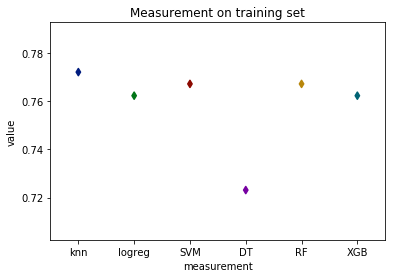

[('knn', 0.7719869706840391), ('logreg', 0.76221498371335505), ('SVM', 0.76710097719869708), ('DT', 0.72312703583061888), ('RF', 0.76710097719869708), ('XGB', 0.76221498371335505)]


In [130]:
import seaborn as sns
train_df = pd.DataFrame(models, columns = ['measurement', 'value'])
sns.pointplot(y="value", x="measurement",
              data=train_df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None).set_title("Measurement on training set")
plt.show()
print(models)

In [128]:
models2 = []
models2.append(('knn', knn_cv.score(X_test, y_test)))
models2.append(('logreg', logreg_cv.score(X_test, y_test)))
models2.append(('SVM', SVM_cv.score(X_test, y_test)))
models2.append(('DT', DT_cv.score(X_test, y_test)))
#models2.append(('NB', pipeline.score(X_test, y_test)))
models2.append(('RF', RF_cv.score(X_test, y_test)))
models2.append(('XGB', xgb_cv.score(X_test, y_test))) 
print(models2)

[('knn', 0.79870129870129869), ('logreg', 0.7857142857142857), ('SVM', 0.79220779220779225), ('DT', 0.76623376623376627), ('RF', 0.79870129870129869), ('XGB', 0.79220779220779225)]


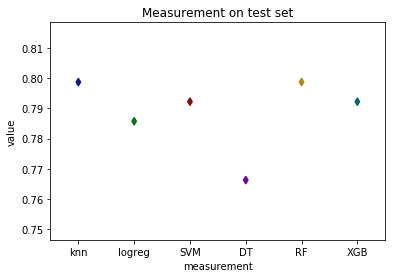

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
test_df = pd.DataFrame(models2, columns = ['measurement', 'value'])
sns.pointplot(y="value", x="measurement",
              data=test_df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None).set_title("Measurement on test set")
plt.show()

KNN performs better in both training (cv) set and test set (79.87%)
We are going to calculate the area under the curve for both models.

    10.1 ACCURACY , CLASSIFICATION REPORT AND CONFUSION MATRIX FOR KNN

Accuracy: 0.7987012987012987 

Calssification Report : 
             precision    recall  f1-score   support

          0       0.82      0.86      0.84        96
          1       0.75      0.69      0.72        58

avg / total       0.80      0.80      0.80       154



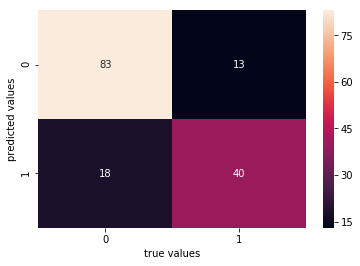

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn_pred = knn_cv.predict(X_test)
print('Accuracy: {} '.format(knn_cv.score(X_test, y_test)))
print()
print('Calssification Report : ')
print(classification_report(y_test, knn_pred))

ax = sns.heatmap(confusion_matrix(y_test, knn_pred), annot = True)
ax.set(xlabel = 'true values', ylabel = 'predicted values')
plt.show()

    10.2 ACCURACY , CLASSIFICATION REPORT AND CONFUSION MATRIX FOR KNN for RF

Accuracy: 0.7987012987012987 

Calssification Report : 
             precision    recall  f1-score   support

          0       0.84      0.83      0.84        96
          1       0.73      0.74      0.74        58

avg / total       0.80      0.80      0.80       154



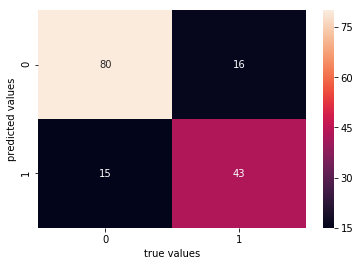

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

RF_pred = RF_cv.predict(X_test)
print('Accuracy: {} '.format(RF_cv.score(X_test, y_test)))
print()
print('Calssification Report : ')
print(classification_report(y_test, RF_pred))

ax = sns.heatmap(confusion_matrix(y_test, RF_pred), annot = True)
ax.set(xlabel = 'true values', ylabel = 'predicted values')
plt.show()

    10.3 ROC CURVE AND AUC COMPUTATION FOR KNN

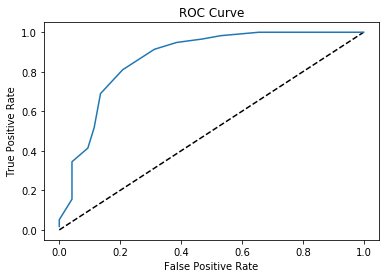

In [141]:
########### Plotting the ROC curve for KNN #################
from sklearn.metrics import roc_curve

y_pred_prob_KNN = knn_cv.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_KNN)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [142]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob_KNN))
print('Our model is better than random guessing')

0.867007902299
Our model is better than random guessing


    10.4 ROC CURVE AND AUC COMPUTATION FOR RF

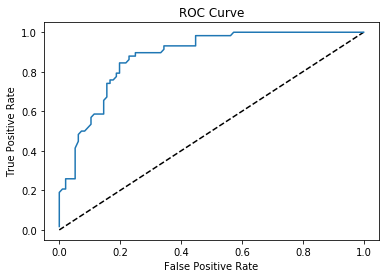

In [140]:
y_pred_prob_RF = RF_cv.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_RF)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [143]:
print(roc_auc_score(y_test, y_pred_prob_RF))
print('Our model is better than random guessing')

0.876975574713
Our model is better than random guessing
